In [1]:
# Breast Cancer Classification with Logistic Regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report, 
                            precision_score, recall_score, roc_auc_score, 
                            roc_curve, precision_recall_curve)

# Load the dataset
data = pd.read_csv('data.csv')


In [2]:

# Data Preprocessing
# Drop unnecessary columns
data = data.drop(['id', 'Unnamed: 32'], axis=1)


In [3]:

# Convert diagnosis to binary (M=1, B=0)
data['diagnosis'] = data['diagnosis'].map({'M':1, 'B':0})

# Split into features and target
X = data.drop('diagnosis', axis=1)
y = data['diagnosis']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [4]:

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression Model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1


In [5]:

# Evaluation Metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Confusion Matrix:
[[106   2]
 [  1  62]]


In [6]:

print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       108
           1       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [7]:

print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_proba):.3f}")


Precision: 0.969
Recall: 0.984
ROC-AUC: 0.998


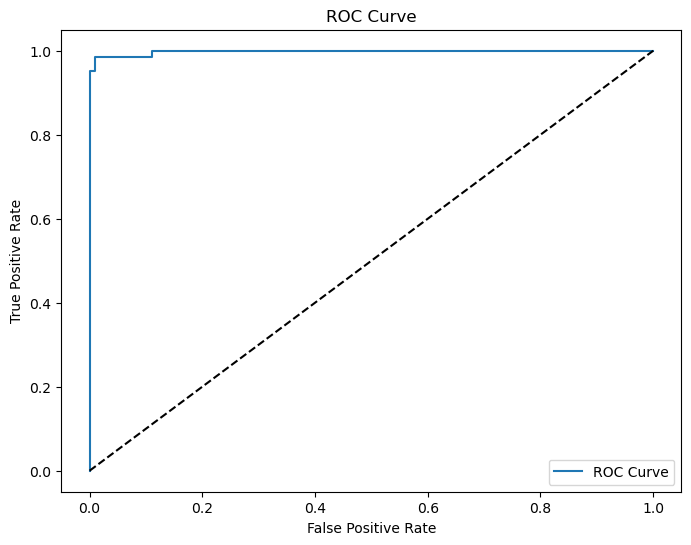

In [8]:

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


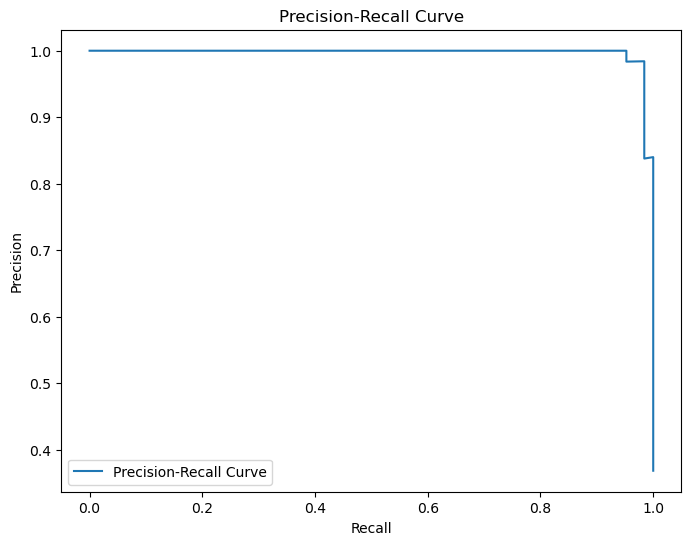

In [9]:

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()



In [10]:

# Threshold Tuning
thresholds = np.arange(0.1, 1, 0.1)
for threshold in thresholds:
    y_pred_thresh = (y_pred_proba >= threshold).astype(int)
    print(f"\nThreshold: {threshold:.1f}")
    print(f"Precision: {precision_score(y_test, y_pred_thresh):.3f}")
    print(f"Recall: {recall_score(y_test, y_pred_thresh):.3f}")



Threshold: 0.1
Precision: 0.849
Recall: 0.984

Threshold: 0.2
Precision: 0.886
Recall: 0.984

Threshold: 0.3
Precision: 0.925
Recall: 0.984

Threshold: 0.4
Precision: 0.954
Recall: 0.984

Threshold: 0.5
Precision: 0.969
Recall: 0.984

Threshold: 0.6
Precision: 0.984
Recall: 0.968

Threshold: 0.7
Precision: 0.984
Recall: 0.952

Threshold: 0.8
Precision: 1.000
Recall: 0.952

Threshold: 0.9
Precision: 1.000
Recall: 0.905


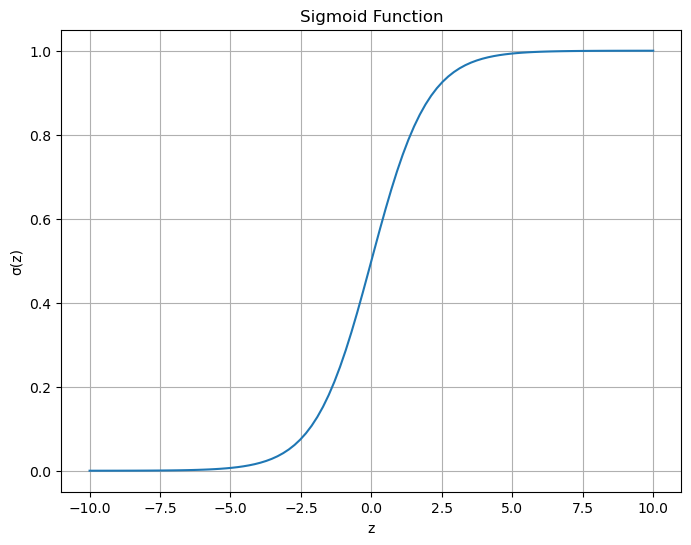

In [11]:

# Sigmoid Function Explanation
x = np.linspace(-10, 10, 100)
y_sigmoid = 1 / (1 + np.exp(-x))
plt.figure(figsize=(8, 6))
plt.plot(x, y_sigmoid)
plt.title('Sigmoid Function')
plt.xlabel('z')
plt.ylabel('σ(z)')
plt.grid(True)
plt.show()